In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Datasets/bank-full.csv")

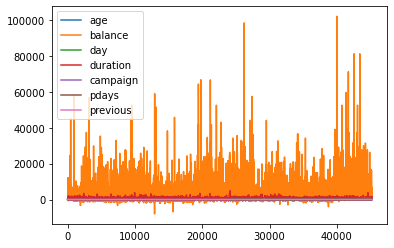

In [3]:
data.plot()

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data['default'] = data['default'].map({'yes':1 ,'no':0}) 

data['housing'] = data['housing'].map({'yes':1 ,'no':0}) 

data['loan'] = data['loan'].map({'yes':1 ,'no':0}) 

data['Target'] = data['Target'].map({'yes':1 ,'no':0}) 

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


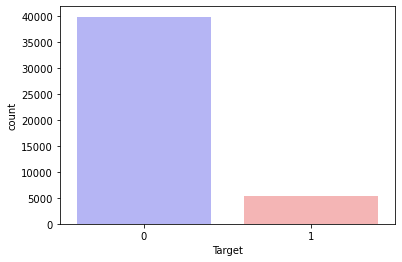

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Target", data=data, palette="bwr")
plt.show()

In [8]:
countNoLoan = len(data[data.Target == 0])
countHaveLoan = len(data[data.Target == 1])
print("Percentage of Customer can't Have a Loan: {:.2f}%".format((countNoLoan / (len(data.Target))*100)))
print("Percentage of Customer can Have a Loan: {:.2f}%".format((countHaveLoan / (len(data.Target))*100)))

Percentage of Customer can't Have a Loan: 88.30%
Percentage of Customer can Have a Loan: 11.70%


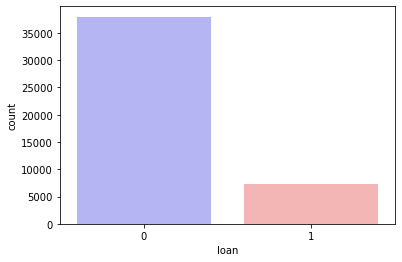

In [9]:
sns.countplot(x="loan", data=data, palette="bwr")
plt.show()

In [10]:
countNANLoan = len(data[data.loan == 0])
countOKLoan = len(data[data.loan == 1])
print("Percentage of Customer can't Have a Loan: {:.2f}%".format((countNoLoan / (len(data.loan))*100)))
print("Percentage of Customer can Have a Loan: {:.2f}%".format((countHaveLoan / (len(data.loan))*100)))

Percentage of Customer can't Have a Loan: 88.30%
Percentage of Customer can Have a Loan: 11.70%


In [11]:
data.groupby('Target').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.838986,0.019112,1303.714969,0.581008,0.169330,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


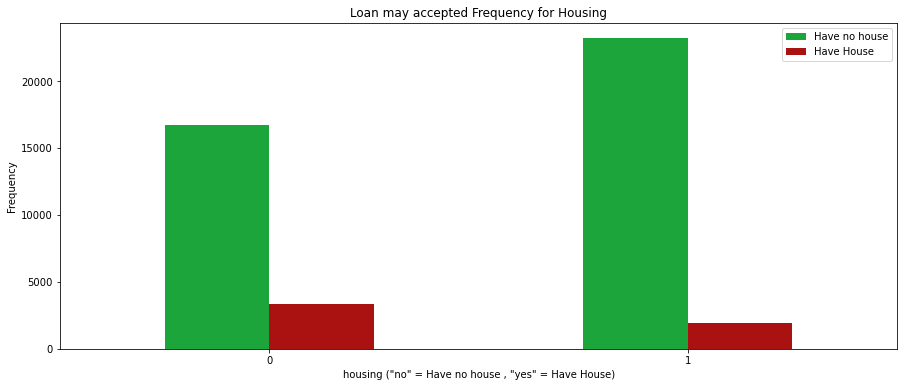

In [12]:
pd.crosstab(data.housing,data.Target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Loan may accepted Frequency for Housing')
plt.xlabel('housing ("no" = Have no house , "yes" = Have House)')
plt.xticks(rotation=0)
plt.legend(["Have no house", "Have House"])
plt.ylabel('Frequency')
plt.show()

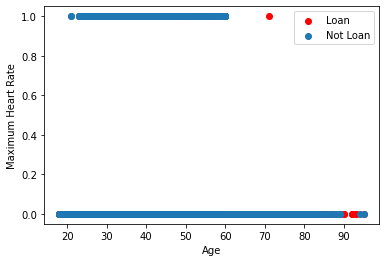

In [13]:
plt.scatter(x=data.age[data.Target== 1], y=data.default[(data.Target== 1)], c="red")
plt.scatter(x=data.age[data.Target== 0], y=data.default[(data.Target== 0)])
plt.legend(["Loan", "Not Loan"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [14]:
x=data.drop(['Target','contact','poutcome','month','job','marital','education'], axis = 1)

In [15]:
y = data.Target.values

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [17]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\Pavan K M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
pred=clf.predict(x_test)
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
clf.score(x_test,y_test)

0.8876969864528614

In [20]:
x_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
14001,37,0,1403,1,0,10,91,15,-1,0
32046,36,0,-253,1,0,14,1073,1,-1,0
13318,47,0,-406,0,1,8,243,5,-1,0
42991,57,0,501,1,1,11,105,7,188,2
14237,33,1,-406,1,1,14,332,2,-1,0
...,...,...,...,...,...,...,...,...,...,...
17247,28,0,111,1,1,28,230,2,-1,0
13270,38,0,0,0,0,8,452,3,-1,0
26058,37,0,510,1,0,19,67,2,90,6
14276,33,0,179,0,0,14,244,7,-1,0
